<a href="https://colab.research.google.com/github/mushrafi88/MSE_510/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrafi Munim Sushmit

Homework 4 for the MSE510/420 Course
- Instructor Sergei V. Kalinin, sergei2@utk.edu
- Please provide your name in the beginning of the notebook
- To submit the homework, please share it with my gmail address (available on Canvas)

- Run the code cell below
- If the gdown does not work due to too many requests, use the file hw3.zip on course GitHub page

In [1]:
!gdown https://drive.google.com/uc?id=1UC6bu5nVFRBhHIL698jk0zt3AuDqREkV
!unzip hw3.zip

Downloading...
From: https://drive.google.com/uc?id=1UC6bu5nVFRBhHIL698jk0zt3AuDqREkV
To: /content/hw3.zip
100% 9.96k/9.96k [00:00<00:00, 24.7MB/s]
Archive:  hw3.zip
  inflating: hw3p1.csv               
  inflating: hw3p2.csv               
  inflating: hw3p3.csv               


Now you have created 3 csv files, named hw3p1, hw3p2, and hw3p3 respectively. Load the file hw3p1 into Pandas DataFrame. It will contain three sets of data representing x and corresponding f(x). There are three sets of data overall.

In [2]:
import pandas as pd

# Load all three CSV files
df1 = pd.read_csv("hw3p1.csv")

df1


,x,y,x.1,y.1,x.2,y.2
0,0.0,-0.130805,0.0,0.005324,0.0,0.773195
1,0.1,0.868900,0.1,0.794294,0.1,0.236410
2,0.2,0.765312,0.2,0.964300,0.2,0.754516
3,0.3,0.814069,0.3,1.725895,0.3,0.307927
4,0.4,0.629915,0.4,1.198981,0.4,0.027610
...,...,...,...,...,...,...
95,9.5,9.840495,9.5,25.963140,9.5,9.991476
96,9.6,9.609545,9.6,25.090002,9.6,8.787114
97,9.7,9.998531,9.7,25.196839,9.7,10.080249
98,9.8,10.575275,9.8,28.172518,9.8,9.354173


In [3]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 8.7 MB/s eta 0:00:00


## Problem 1. Fit the first set of data. Please try to find equation that can explain whole data set (not spline)

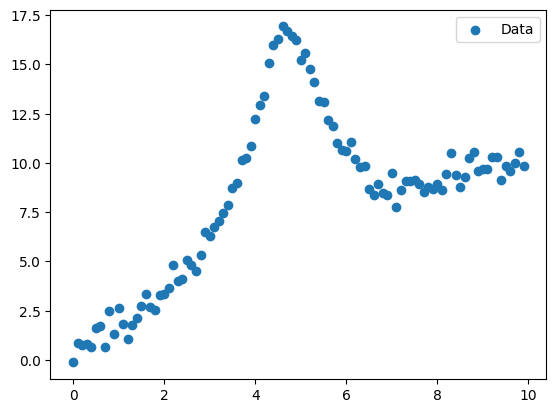

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


# Extract
X = df1[['x']].values
y = df1['y'].values

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [5]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=50,
    maxsize=20,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin"],
    model_selection="best",
)

model.fit(X, y)

[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia 1.10.3 - 1.11
[juliapkg] Using Julia 1.11.5 at /usr/local/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapkg
[juliapkg] Writing Project.toml:
           | [deps]
           | SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
           | Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
           | PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
           | OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
           | 
           | [compat]
           | SymbolicRegression = "~1.11"
           | Serialization = "^1"
           | PythonCall = "=0.9.26"
           | OpenSSL_jll = "~3.0"
[juliapkg] Installing packages:
           | impo

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 7.400e+04
Progress: 213 / 9300 total iterations (2.290%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.890e+01  0.000e+00  y = 8.2561
3           1.196e+01  2.287e-01  y = x₀ + 3.3061
5           1.190e+01  2.452e-03  y = (x₀ * 0.91618) - -3.7211
6           8.558e+00  3.298e-01  y = x₀ - (sin(x₀) + -3.4926)
8           3.635e+00  4.281e-01  y = (4.0285 + x₀) - (4.0285 * sin(x₀))
10          3.542e+00  1.296e-02  y = ((sin(x₀ - 3.2083) * 4.3812) + x₀) + 4.1344
11          1.731e+00  7.159e-01  y = (x₀ + 10.037) - (sin(2.1348 - sin(x₀)) * 9.1252)
13          1.646e+00  2.529e-02  y = (((sin(sin(x₀) - 2.1433) * 3.8597) + 4.1479) / 0.39256...
                                      ) + x₀
15          1.241e+00  1.412e-01  y = (x₀ + (sin(sin(x₀ - -1

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           8.256122   
	1         0.228678                                     x0 + 3.3061442   
	2         0.002453                      (x0 * 0.91619974) + 3.7208977   
	3         0.386545                 15.415917 / (sin(x0) - -1.9461012)   
	4         0.634729                     x0 / sin(sin(x0) - -1.2526473)   
	5         1.009908          x0 + (3.2467957 / (sin(x0) - -1.2495395))   
	6         0.129018       (2.53375 / (sin(sin(x0)) - -1.0433298)) + x0   
	7   >>>>  1.857460  x0 + (0.66647685 / (sin(x0 * -0.3353629) + 1.0...   
	8         0.011620  x0 + ((0.7054026 / (sin(x0 * -0.33525413) - -1...   
	9         0.000662  ((x0 + -0.18417889) * 1.0050747) + (0.7099095 ...   
	10        0.000546  ((sin(0.33174232 * x0) / sin(sin((x0 * 0.41335...   
	11        0.001201  (sin(x0 * 0.34713405) / (sin((x0 * 0.4129771) ...   
	12        0.004867  ((x0 / 0.9687359) + (sin(x0 * 0.34983742) / si...   
	
	         loss  complexity  
	0   18.896236           1  
	1   11.960463           3  
	2   11.901931           5  
	3    8.086177           6  
	4    4.286314           7  
	5    1.561300           8  
	6    1.372317           9  
	7    0.214176          10  
	8    0.209256          12  
	9    0.208979          14  
	10   0.208523          18  
	11   0.208273          19  
	12   0.207261          20  
]

  - outputs/20260218_201337_gzovuJ/hall_of_fame.csv


In [6]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,18.896236,8.256122,0.000000,8.25612200000000,PySRFunction(X=>8.25612200000000)
1,3,11.960463,x0 + 3.3061442,0.228678,x0 + 3.3061442,PySRFunction(X=>x0 + 3.3061442)
2,5,11.901931,(x0 * 0.91619974) + 3.7208977,0.002453,x0*0.91619974 + 3.7208977,PySRFunction(X=>x0*0.91619974 + 3.7208977)
3,6,8.086177,15.415917 / (sin(x0) - -1.9461012),0.386545,15.415917/(sin(x0) - 1*(-1.9461012)),PySRFunction(X=>15.415917/(sin(x0) - 1*(-1.946...
4,7,4.286314,x0 / sin(sin(x0) - -1.2526473),0.634729,x0/sin(sin(x0) - 1*(-1.2526473)),PySRFunction(X=>x0/sin(sin(x0) - 1*(-1.2526473)))
5,8,1.561300,x0 + (3.2467957 / (sin(x0) - -1.2495395)),1.009908,x0 + 3.2467957/(sin(x0) - 1*(-1.2495395)),PySRFunction(X=>x0 + 3.2467957/(sin(x0) - 1*(-...
6,9,1.372317,(2.53375 / (sin(sin(x0)) - -1.0433298)) + x0,0.129018,x0 + 2.53375/(sin(sin(x0)) - 1*(-1.0433298)),PySRFunction(X=>x0 + 2.53375/(sin(sin(x0)) - 1...
7,10,0.214176,x0 + (0.66647685 / (sin(x0 * -0.3353629) + 1.0...,1.857460,x0 + 0.66647685/(sin(x0*(-0.3353629)) + 1.0553...,PySRFunction(X=>x0 + 0.66647685/(sin(x0*(-0.33...
8,12,0.209256,x0 + ((0.7054026 / (sin(x0 * -0.33525413) - -1...,0.011620,x0 - 0.15029216 + 0.7054026/(sin(x0*(-0.335254...,PySRFunction(X=>x0 - 0.15029216 + 0.7054026/(s...
9,14,0.208979,((x0 + -0.18417889) * 1.0050747) + (0.7099095 ...,0.000662,(x0 - 0.18417889)*1.0050747 + 0.7099095/(sin(x...,PySRFunction(X=>(x0 - 0.18417889)*1.0050747 + ...


In [7]:
print(model.get_best())

complexity                                                      10
loss                                                      0.214176
equation         x0 + (0.66647685 / (sin(x0 * -0.3353629) + 1.0...
score                                                      1.85746
sympy_format     x0 + 0.66647685/(sin(x0*(-0.3353629)) + 1.0553...
lambda_format    PySRFunction(X=>x0 + 0.66647685/(sin(x0*(-0.33...
Name: 7, dtype: object


In [8]:
y_pred_train = model.predict(X)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df


,Metric,Value
0,MSE,0.214176
1,RMSE,0.462791
2,MAE,0.364264
3,R²,0.988666


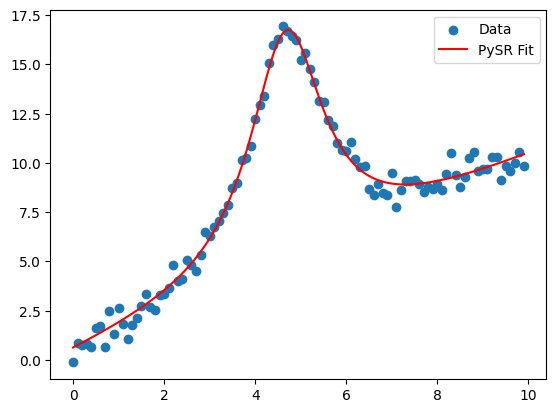

In [10]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


## Problem 2. Fit the second set of data.  Please try to find equation that can explain whole data set (not spline)

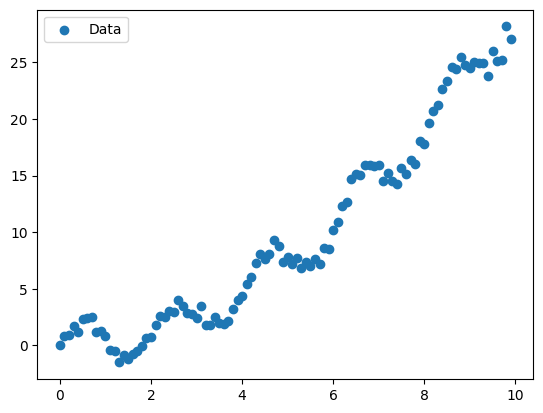

In [11]:
import matplotlib.pyplot as plt
import numpy as np


X = df1[['x.1']].values   # must be 2D
y = df1['y.1'].values     # 1D

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [12]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=40,
    maxsize=25,
    binary_operators=["+", "-", "*"],
    unary_operators=["sin"],
    model_selection="best",
    verbosity=1,
)

model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.790e+04
Progress: 123 / 9300 total iterations (1.323%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.054e+01  0.000e+00  y = x₀
3           1.205e+01  8.073e-01  y = x₀ * 2.2152
5           2.223e+00  8.450e-01  y = x₀ * (x₀ * 0.29606)
7           2.190e+00  7.419e-03  y = (x₀ * (x₀ * 0.29151)) - -0.27053
9           2.188e+00  3.568e-04  y = (x₀ * ((x₀ * 0.29664) + -0.054253)) - -0.37061
13          2.148e+00  4.627e-03  y = (x₀ * 0.13558) * (((x₀ + sin(sin(x₀))) + x₀) - -1.1547...
                                      )
17          2.145e+00  3.198e-04  y = ((((x₀ + (sin(sin(x₀)) + x₀)) - 0.22901) + 0.2965) - -...
                                      1.1547) * (x₀ * 0.13558)
18          2.023e+00  5.852e-02  y = ((x₀ + 0.62216) * (sin(sin

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.807261                                     x0 * 2.2152216   
	2         0.845024                             x0 * (x0 * 0.29606178)   
	3         0.007419              (x0 * (x0 * 0.2915069)) - -0.27053288   
	4         0.010468           (x0 * 4.4616103) * sin(x0 * 0.070397206)   
	5         0.633757       ((sin(x0 * 3.097524) + x0) * x0) * 0.3004605   
	6   >>>>  0.479274  (sin(x0 * 3.0954723) * 1.9915369) + ((x0 * 0.2...   
	7         0.002126  (sin(x0 * 3.0952647) * 1.9881978) + ((x0 + 0.0...   
	8         0.018213  (x0 * (x0 * 0.29920572)) + (((x0 * 0.047261026...   
	9         0.051613  (((sin(x0 * -0.66250896) + 6.677228) * sin(x0 ...   
	10        0.040232  ((sin(x0 * 3.0960076) * (sin((x0 + x0) * x0) +...   
	11        0.008371  (((sin((x0 + x0) * x0) * 0.41794512) + 1.99205...   
	12        0.074748  (((sin(((x0 + x0) * x0) - sin(x0)) + 6.6827955...   
	13        0.000679  ((sin(x0 * 3.0950263) * (sin((x0 * (x0 + x0)) ...   
	14        0.066980  (((sin((x0 * (x0 + x0)) - sin(x0)) * 0.5169075...   
	15        0.002848  ((x0 * x0) + (sin(x0 * 3.0945113) * ((sin(sin(...   
	
	         loss  complexity  
	0   60.535260           1  
	1   12.045662           3  
	2    2.222553           5  
	3    2.189819           7  
	4    2.167016           8  
	5    0.610082          10  
	6    0.233935          12  
	7    0.232943          14  
	8    0.224611          16  
	9    0.213312          17  
	10   0.196820          19  
	11   0.193552          21  
	12   0.179612          22  
	13   0.179490          23  
	14   0.167862          24  
	15   0.167384          25  
]

  - outputs/20260218_201710_bRu6L2/hall_of_fame.csv


In [13]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,60.535260,x0,0.000000,x0,PySRFunction(X=>x0)
1,3,12.045662,x0 * 2.2152216,0.807261,x0*2.2152216,PySRFunction(X=>x0*2.2152216)
2,5,2.222553,x0 * (x0 * 0.29606178),0.845024,x0*x0*0.29606178,PySRFunction(X=>x0*x0*0.29606178)
3,7,2.189819,(x0 * (x0 * 0.2915069)) - -0.27053288,0.007419,x0*x0*0.2915069 - 1*(-0.27053288),PySRFunction(X=>x0*x0*0.2915069 - 1*(-0.270532...
4,8,2.167016,(x0 * 4.4616103) * sin(x0 * 0.070397206),0.010468,x0*4.4616103*sin(x0*0.070397206),PySRFunction(X=>x0*4.4616103*sin(x0*0.070397206))
5,10,0.610082,((sin(x0 * 3.097524) + x0) * x0) * 0.3004605,0.633757,(x0 + sin(x0*3.097524))*x0*0.3004605,PySRFunction(X=>(x0 + sin(x0*3.097524))*x0*0.3...
6,12,0.233935,(sin(x0 * 3.0954723) * 1.9915369) + ((x0 * 0.2...,0.479274,x0*0.29886106*x0 + sin(x0*3.0954723)*1.9915369,PySRFunction(X=>x0*0.29886106*x0 + sin(x0*3.09...
7,14,0.232943,(sin(x0 * 3.0952647) * 1.9881978) + ((x0 + 0.0...,0.002126,(x0 + 0.07462686)*x0*0.29607707 + sin(x0*3.095...,PySRFunction(X=>(x0 + 0.07462686)*x0*0.2960770...
8,16,0.224611,(x0 * (x0 * 0.29920572)) + (((x0 * 0.047261026...,0.018213,x0*x0*0.29920572 + (x0*0.047261026 + 1.7545666...,PySRFunction(X=>x0*x0*0.29920572 + (x0*0.04726...
9,17,0.213312,(((sin(x0 * -0.66250896) + 6.677228) * sin(x0 ...,0.051613,(x0*x0 + (sin(x0*(-0.66250896)) + 6.677228)*si...,PySRFunction(X=>(x0*x0 + (sin(x0*(-0.66250896)...


In [14]:
print(model.get_best())

complexity                                                      12
loss                                                      0.233935
equation         (sin(x0 * 3.0954723) * 1.9915369) + ((x0 * 0.2...
score                                                     0.479274
sympy_format        x0*0.29886106*x0 + sin(x0*3.0954723)*1.9915369
lambda_format    PySRFunction(X=>x0*0.29886106*x0 + sin(x0*3.09...
Name: 6, dtype: object


In [15]:
y_pred_train = model.predict(X)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df

,Metric,Value
0,MSE,0.233936
1,RMSE,0.483669
2,MAE,0.397760
3,R²,0.996934


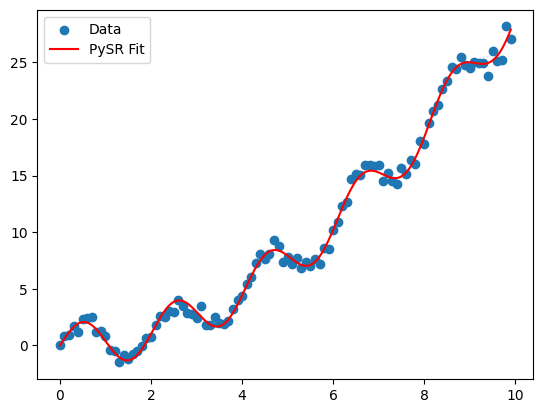

In [17]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


## Problem 3. Fit the third set of data.  Please try to find equation that can explain whole data set (not spline)

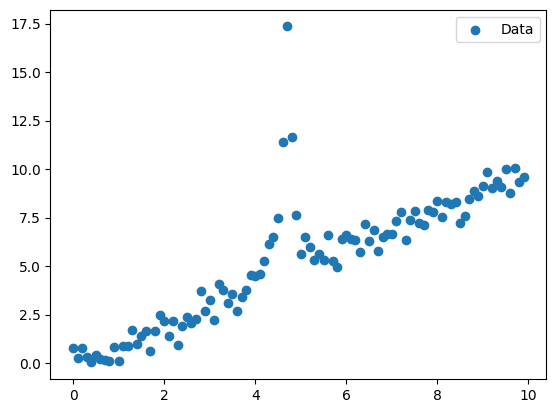

In [18]:
import matplotlib.pyplot as plt
import numpy as np


X = df1[['x.2']].values   # must be 2D
y = df1['y.2'].values     # 1D

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [19]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=40,
    maxsize=25,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin", "cos"],
    model_selection="best",
    verbosity=1,
)

model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.600e+04
Progress: 117 / 9300 total iterations (1.258%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.062e+00  0.000e+00  y = x₀
3           2.968e+00  1.566e-02  y = x₀ + 0.3073
4           2.563e+00  1.467e-01  y = x₀ - sin(x₀)
6           2.319e+00  4.999e-02  y = (x₀ - sin(x₀)) + 0.4938
8           2.073e+00  5.610e-02  y = 0.27773 + (x₀ - (0.13794 / cos(x₀)))
9           1.721e+00  1.860e-01  y = x₀ - ((0.13794 / cos(x₀)) + sin(x₀))
11          1.608e+00  3.401e-02  y = (x₀ + 0.27773) - ((0.13794 / cos(x₀)) + sin(x₀))
13          1.468e+00  4.565e-02  y = (x₀ + 0.27773) - (sin(x₀) + ((0.13794 / cos(x₀)) * 0.7...
                                      8322))
15          1.413e+00  1.906e-02  y = (x₀ + 0.45294) - ((0.098998 / cos(x₀)) + (si

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.062e+00  0.000e+00  y = x₀
3           2.968e+00  1.566e-02  y = x₀ + 0.3073
4           2.563e+00  1.467e-01  y = x₀ - sin(x₀)
6           1.990e+00  1.265e-01  y = x₀ + (-0.10664 / cos(x₀))
8           3.072e-01  9.343e-01  y = x₀ - (-0.064469 / (sin(x₀) + 1.0048))
9           2.997e-01  2.444e-02  y = (0.045013 / (sin(sin(x₀)) + 0.84514)) + x₀
10          2.792e-01  7.085e-02  y = (x₀ - (-0.079395 / (sin(x₀) + 1.0064))) + -0.13185
12          2.611e-01  3.369e-02  y = (-0.19599 - (-0.094626 / (sin(x₀ + 0.013983) + 1.0077)...
                                      )) + x₀
16          2.541e-01  6.731e-03  y = x₀ + (cos(sin(x₀ * 2.0743)) - (0.95525 + (-0.093617 / ...
                                      (sin(x₀) + 1.0077))))
18          2.398e-01  2.890e-02  y = cos(sin(x₀ / -0.48573)) + (x₀ - ((-0.094626 / (sin(x₀ ...
           

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.015664                                     x0 + 0.3073024   
	2         0.146711                                       x0 - sin(x0)   
	3         0.126464                       x0 + (-0.10663902 / cos(x0))   
	4   >>>>  0.934274         x0 - (-0.06446889 / (sin(x0) + 1.0048286))   
	5         0.024440    (0.045013316 / (sin(sin(x0)) + 0.8451413)) + x0   
	6         0.070854  (x0 - (-0.079395175 / (sin(x0) + 1.0064261))) ...   
	7         0.033686  (-0.19599082 - (-0.09462614 / (sin(x0 + 0.0139...   
	8         0.006731  x0 + (cos(sin(x0 * 2.0742972)) - (0.9552499 + ...   
	9         0.028901  cos(sin(x0 / -0.4857309)) + (x0 - ((-0.0946259...   
	10        0.013994  (x0 - ((-0.09462595 / (sin(x0 + 0.0139828995) ...   
	11        0.002922  (x0 - (-0.094626136 / (sin(x0) + 1.007727))) -...   
	12        0.000002  (x0 - (-0.094626136 / (1.007727 + sin(x0)))) +...   
	13        0.002377  x0 + (((cos(((x0 / -0.24048832) + sin(x0)) + -...   
	14        0.037940  x0 + (cos(sin((-0.20791815 - x0) / sin(x0 + 1....   
	15        0.001716  x0 + (cos(cos(-0.6657348 / cos(1.0078129 * (x0...   
	16        0.021811  x0 + (cos(sin(2.18702 * x0) - (-0.09462614 / (...   
	
	        loss  complexity  
	0   3.062223           1  
	1   2.967776           3  
	2   2.562803           4  
	3   1.990078           6  
	4   0.307164           8  
	5   0.299748           9  
	6   0.279244          10  
	7   0.261051          12  
	8   0.254116          16  
	9   0.239844          18  
	10  0.236511          19  
	11  0.235821          20  
	12  0.235820          21  
	13  0.235260          22  
	14  0.226501          23  
	15  0.226113          24  
	16  0.221235          25  
]

  - outputs/20260218_201944_ZKPsQQ/hall_of_fame.csv


In [20]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,3.062223,x0,0.000000,x0,PySRFunction(X=>x0)
1,3,2.967776,x0 + 0.3073024,0.015664,x0 + 0.3073024,PySRFunction(X=>x0 + 0.3073024)
2,4,2.562803,x0 - sin(x0),0.146711,x0 - sin(x0),PySRFunction(X=>x0 - sin(x0))
3,6,1.990078,x0 + (-0.10663902 / cos(x0)),0.126464,x0 - 0.10663902/cos(x0),PySRFunction(X=>x0 - 0.10663902/cos(x0))
4,8,0.307164,x0 - (-0.06446889 / (sin(x0) + 1.0048286)),0.934274,x0 - (-1)*0.06446889/(sin(x0) + 1.0048286),PySRFunction(X=>x0 - (-1)*0.06446889/(sin(x0) ...
5,9,0.299748,(0.045013316 / (sin(sin(x0)) + 0.8451413)) + x0,0.024440,x0 + 0.045013316/(sin(sin(x0)) + 0.8451413),PySRFunction(X=>x0 + 0.045013316/(sin(sin(x0))...
6,10,0.279244,(x0 - (-0.079395175 / (sin(x0) + 1.0064261))) ...,0.070854,x0 - 0.13184857 - (-1)*0.079395175/(sin(x0) + ...,PySRFunction(X=>x0 - 0.13184857 - (-1)*0.07939...
7,12,0.261051,(-0.19599082 - (-0.09462614 / (sin(x0 + 0.0139...,0.033686,x0 - 0.19599082 - (-1)*0.09462614/(sin(x0 + 0....,PySRFunction(X=>x0 - 0.19599082 - (-1)*0.09462...
8,16,0.254116,x0 + (cos(sin(x0 * 2.0742972)) - (0.9552499 + ...,0.006731,x0 - (0.9552499 - 0.09361669/(sin(x0) + 1.0077...,PySRFunction(X=>x0 - (0.9552499 - 0.09361669/(...
9,18,0.239844,cos(sin(x0 / -0.4857309)) + (x0 - ((-0.0946259...,0.028901,x0 - (0.9803574 - 0.09462595/(sin(x0 + 0.01398...,PySRFunction(X=>x0 - (0.9803574 - 0.09462595/(...


In [21]:
print(model.get_best())

complexity                                                       8
loss                                                      0.307164
equation                x0 - (-0.06446889 / (sin(x0) + 1.0048286))
score                                                     0.934274
sympy_format            x0 - (-1)*0.06446889/(sin(x0) + 1.0048286)
lambda_format    PySRFunction(X=>x0 - (-1)*0.06446889/(sin(x0) ...
Name: 4, dtype: object


In [22]:
y_pred_train = model.predict(X)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df

,Metric,Value
0,MSE,0.307164
1,RMSE,0.554223
2,MAE,0.453473
3,R²,0.972306


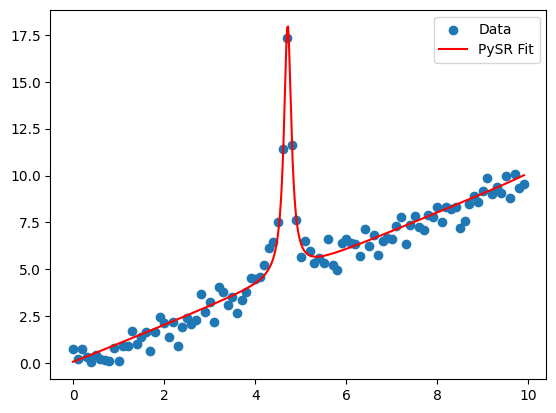

In [24]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


Load the file hw3p2 into Pandas DataFrame. It will contain values of x, y, and f = f(x,y)

## Problem 4: Fit f(x,y).  Please try to find equation that can explain whole data set (not spline)

In [25]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("hw3p2.csv")

df2

,x,y,z
0,2.250778,-2.388144,0.004587
1,2.761474,-1.260846,0.009974
2,-1.490146,1.258894,0.149169
3,-0.828948,1.705002,0.165780
4,-1.877060,-0.781176,0.126591
...,...,...,...
95,1.493305,1.825888,0.061920
96,-1.445071,-2.207995,0.030754
97,-1.177728,-2.416169,0.026985
98,-2.011753,-0.262688,0.127699


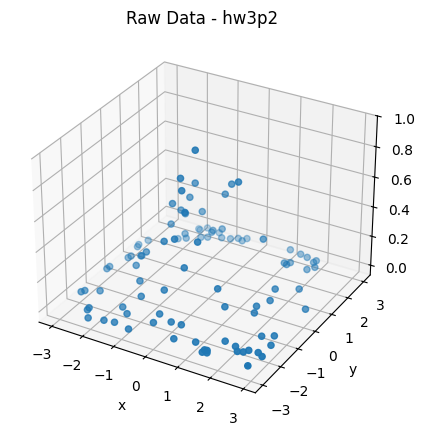

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract variables
X = df2[['x', 'y']].values
z = df2['z'].values


# 3D scatter plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['x'], df2['y'], df2['z'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Raw Data - hw3p2")
plt.show()


I have tried multiple approaches, the scaled version gives the best result for this problem.

In [27]:
from pysr import PySRRegressor
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_z = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
z_scaled = scaler_z.fit_transform(z.reshape(-1,1)).flatten()

model = PySRRegressor(
    niterations=300,
    population_size=30,
    maxsize=15,
    binary_operators=["+", "-", "*"],
    unary_operators=["sin", "exp"],
    model_selection="best",
    parsimony=1e-4,
    verbosity=1,
)

model.fit(X_scaled, z_scaled)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.470e+04
Progress: 207 / 9300 total iterations (2.226%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.000e+00  0.000e+00  y = -9.7661e-07
3           9.168e-01  4.341e-02  y = sin(exp(x₁))
4           8.982e-01  2.052e-02  y = sin(sin(exp(x₁)))
5           7.721e-01  1.513e-01  y = sin(exp(x₁) + x₁)
6           6.801e-01  1.268e-01  y = sin(x₁ + exp(sin(x₁)))
7           6.466e-01  5.062e-02  y = sin(exp(x₁)) * sin(exp(x₀))
9           6.042e-01  3.384e-02  y = sin(exp(x₀)) * (sin(exp(x₁)) * 1.2586)
10          4.233e-01  3.558e-01  y = (x₁ * (x₁ * -0.63256)) - sin(x₀ - 1.6099)
12          3.676e-01  7.056e-02  y = sin(((x₁ * (x₁ * -1.2605)) + 1.6747) - (x₀ * x₀))
14          3.530e-01  2.032e-02  y = ((x₁ * x₁) * -0.78146) - (0.18089 - (sin(

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.000e+00  0.000e+00  y = -9.7661e-07
3           9.168e-01  4.341e-02  y = sin(exp(x₁))
4           8.982e-01  2.052e-02  y = sin(sin(exp(x₁)))
5           7.721e-01  1.513e-01  y = sin(exp(x₁) + x₁)
6           6.537e-01  1.664e-01  y = sin((x₁ * 1.7175) + 1.3699)
7           5.779e-01  1.233e-01  y = sin(exp(x₁) - (x₀ * x₀))
8           5.079e-01  1.290e-01  y = sin(sin(exp(x₁)) - (x₀ * x₀))
9           4.389e-01  1.460e-01  y = sin(x₁ - -1.5294) - (x₀ * sin(x₀))
10          2.788e-01  4.538e-01  y = exp(sin(exp(x₁)) - (x₀ * x₀)) + -0.78479
11          2.660e-01  4.707e-02  y = exp(sin(x₁ + 7.7536) - (x₀ * x₀)) + -0.92577
12          1.917e-01  3.273e-01  y = exp((sin(exp(x₁)) - (x₀ * x₀)) * 1.4171) + -0.85529
13          1.349e-01  3.516e-01  y = exp(sin(x₁ - -1.4589) * (1.5578 - (x₀ * x₀))) + -1.622...
                          

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       -9.766081e-7   
	1         0.043407                                       sin(exp(x1))   
	2         0.020525                                  sin(sin(exp(x1)))   
	3         0.151308                                  sin(exp(x1) + x1)   
	4         0.166408                  sin((x1 * 1.7174814) + 1.3699071)   
	5         0.123312                           sin(exp(x1) - (x0 * x0))   
	6         0.129033                      sin(sin(exp(x1)) - (x0 * x0))   
	7         0.145989              sin(x1 - -1.5293764) - (x0 * sin(x0))   
	8         0.453806         exp(sin(exp(x1)) - (x0 * x0)) + -0.7847921   
	9         0.047071  exp(sin(x1 + 7.753628) - (x0 * x0)) + -0.92576915   
	10        0.327299  exp((sin(exp(x1)) - (x0 * x0)) * 1.4170709) + ...   
	11        0.351597  exp(sin(x1 - -1.4589441) * (1.5578228 - (x0 * ...   
	12        0.925056  exp(sin(x1 - -1.452328) * exp(0.511219 - (x0 *...   
	13  >>>>  0.528868  exp(((sin(x1 - -1.4794186) * 3.2625625) + -1.8...   
	
	        loss  complexity  
	0   1.000000           1  
	1   0.916848           3  
	2   0.898221           4  
	3   0.772096           5  
	4   0.653734           6  
	5   0.577893           7  
	6   0.507936           8  
	7   0.438942           9  
	8   0.278818          10  
	9   0.265998          11  
	10  0.191750          12  
	11  0.134908          13  
	12  0.053492          14  
	13  0.031521          15  
]

  - outputs/20260218_202232_Gzln5l/hall_of_fame.csv


In [28]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,1.000000,-9.766081e-7,0.000000,-9.76608100000000e-7,PySRFunction(X=>-9.76608100000000E-7)
1,3,0.916848,sin(exp(x1)),0.043407,sin(exp(x1)),PySRFunction(X=>sin(exp(x1)))
2,4,0.898221,sin(sin(exp(x1))),0.020525,sin(sin(exp(x1))),PySRFunction(X=>sin(sin(exp(x1))))
3,5,0.772096,sin(exp(x1) + x1),0.151308,sin(x1 + exp(x1)),PySRFunction(X=>sin(x1 + exp(x1)))
4,6,0.653734,sin((x1 * 1.7174814) + 1.3699071),0.166408,sin(x1*1.7174814 + 1.3699071),PySRFunction(X=>sin(x1*1.7174814 + 1.3699071))
5,7,0.577893,sin(exp(x1) - (x0 * x0)),0.123312,sin(-x0*x0 + exp(x1)),PySRFunction(X=>sin(-x0*x0 + exp(x1)))
6,8,0.507936,sin(sin(exp(x1)) - (x0 * x0)),0.129033,sin(-x0*x0 + sin(exp(x1))),PySRFunction(X=>sin(-x0*x0 + sin(exp(x1))))
7,9,0.438942,sin(x1 - -1.5293764) - (x0 * sin(x0)),0.145989,-x0*sin(x0) + sin(x1 - 1*(-1.5293764)),PySRFunction(X=>-x0*sin(x0) + sin(x1 - 1*(-1.5...
8,10,0.278818,exp(sin(exp(x1)) - (x0 * x0)) + -0.7847921,0.453806,exp(-x0*x0 + sin(exp(x1))) - 0.7847921,PySRFunction(X=>exp(-x0*x0 + sin(exp(x1))) - 0...
9,11,0.265998,exp(sin(x1 + 7.753628) - (x0 * x0)) + -0.92576915,0.047071,exp(-x0*x0 + sin(x1 + 7.753628)) - 0.92576915,PySRFunction(X=>exp(-x0*x0 + sin(x1 + 7.753628...


In [29]:
print("Best Equation:")
print(model.get_best())

Best Equation:
complexity                                                      15
loss                                                      0.031521
equation         exp(((sin(x1 - -1.4794186) * 3.2625625) + -1.8...
score                                                     0.528868
sympy_format     exp(-x0*x0 + sin(x1 - 1*(-1.4794186))*3.262562...
lambda_format    PySRFunction(X=>exp(-x0*x0 + sin(x1 - 1*(-1.47...
Name: 13, dtype: object


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def predict_original(X_original):
    X_scaled = scaler_X.transform(X_original)
    z_scaled_pred = model.predict(X_scaled)
    z_pred = scaler_z.inverse_transform(z_scaled_pred.reshape(-1,1)).flatten()
    return z_pred

z_pred = predict_original(X)

mse = mean_squared_error(z, z_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(z, z_pred)
r2 = r2_score(z, z_pred)

print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"R^2  : {r2}")


MSE  : 0.001317411306068409
RMSE : 0.036296161037614
MAE  : 0.025698098353293154
R^2  : 0.9684784906017958


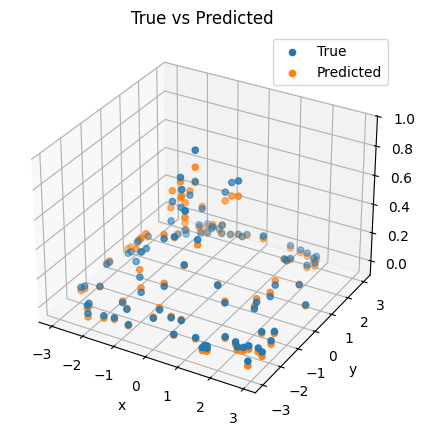

In [31]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['x'], df2['y'], z, label="True")
ax.scatter(df2['x'], df2['y'], z_pred, label="Predicted")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("True vs Predicted")
plt.legend()
plt.show()


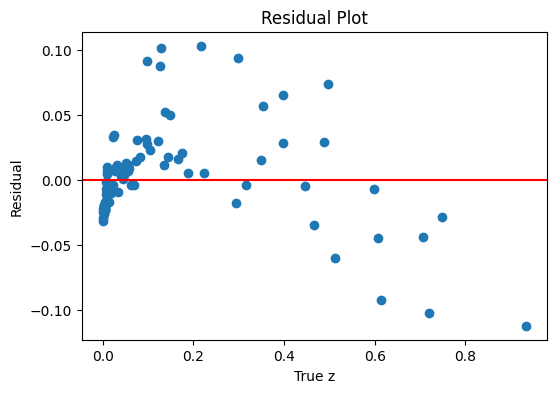

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(z, z_pred - z)
plt.axhline(0, color='red')
plt.xlabel("True z")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


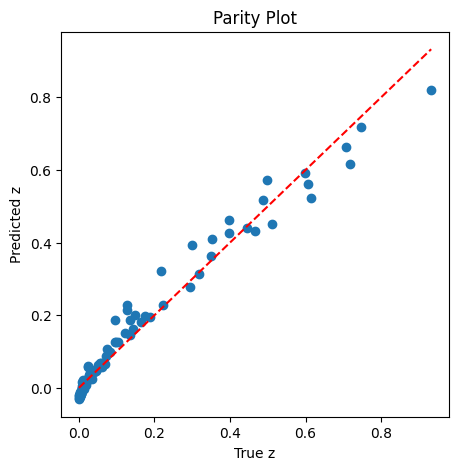

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(z, z_pred)
plt.plot([min(z), max(z)], [min(z), max(z)], 'r--')
plt.xlabel("True z")
plt.ylabel("Predicted z")
plt.title("Parity Plot")
plt.show()


Load the file hw3p3 into Pandas DataFrame. It will contain values of x1, x2, and y.  

## Problem 5: Explore the relationships between y and x2, y and x1, and y(x1,x2). Make you guesses about how this data was generated.

In [34]:
df3 = pd.read_csv("hw3p3.csv")

df3

,x1,x2,y
0,-0.250920,-0.242215,0.226106
1,0.901429,0.871528,-0.666373
2,0.463988,0.473164,-0.517982
3,0.197317,-0.001440,0.670971
4,-0.687963,-0.709930,0.816431
...,...,...,...
95,-0.012409,-0.093990,0.113566
96,0.045466,0.037755,0.093981
97,-0.144918,-0.110803,0.043596
98,-0.949162,-0.921493,0.768004


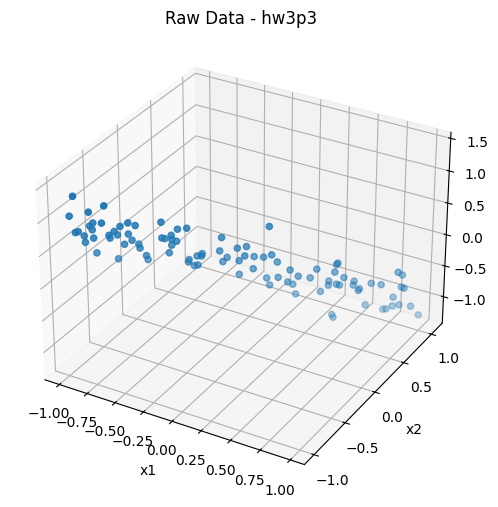

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract variables
X1 = df3['x1'].values
X2 = df3['x2'].values
y = df3['y'].values

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Raw Data - hw3p3')
plt.show()

This looks awfully like the equation of a plane in 3D. So I have tried to use linear polynomial fit using pysr.

In [36]:

# Stack inputs into 2D matrix
X = np.column_stack((X1, X2))

model_linear = PySRRegressor(
    niterations=300,
    population_size=30,
    maxsize=7,                 # small complexity → linear only
    binary_operators=["+", "*"],
    unary_operators=[],        # no nonlinear ops
    parsimony=1e-3,
    model_selection="best",
    verbosity=1,
)

model_linear.fit(X, y)


/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.510e+05
Progress: 899 / 9300 total iterations (9.667%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.893e-01  0.000e+00  y = 0.063644
3           4.583e-02  1.070e+00  y = x₁ * -1.0019
5           2.063e-02  3.991e-01  y = x₀ + (x₁ * -2.0014)
7           1.193e-02  2.740e-01  y = (x₀ * 2.0271) + (x₁ * -3.0279)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.420e+05
Progress: 1642 / 9300 total iterations (17.656%)
════════════════════════════════════════════════════════════════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                              equation      loss  complexity
	0        0.000000                            0.06364429  0.389294           1
	1        1.069667                       x1 * -1.0019433  0.045833           3
	2        0.399055                x0 + (x1 * -2.0013652)  0.020633           5
	3  >>>>  0.273959  (x0 * 2.0271194) + (x1 * -3.0278835)  0.011929           7
]

  - outputs/20260218_202352_IZxtn5/hall_of_fame.csv


In [37]:
print("Best Linear Model:")
print(model_linear.get_best())

Best Linear Model:
complexity                                                     7
loss                                                    0.011929
equation                    (x0 * 2.0271194) + (x1 * -3.0278835)
score                                                   0.273959
sympy_format                      x0*2.0271194 + x1*(-3.0278835)
lambda_format    PySRFunction(X=>x0*2.0271194 + x1*(-3.0278835))
Name: 3, dtype: object


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model_linear.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)


MSE: 0.011928969774961655
RMSE: 0.1092198231776707
R^2: 0.9693573954902813


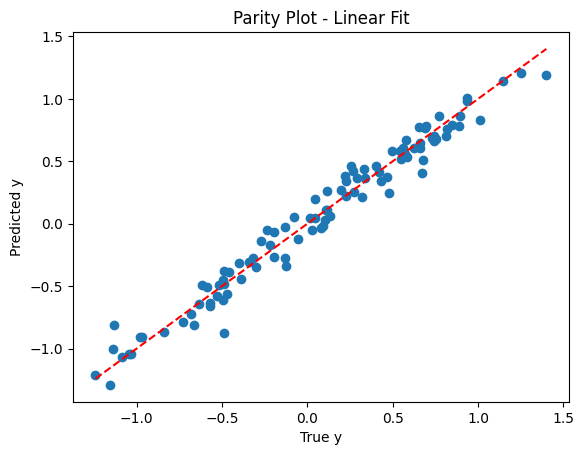

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Parity Plot - Linear Fit")
plt.show()


## Problem 6: Using ChatGPT, explore the the connection between the evolution of specific areas in physics and the development of special functions. Feel free to choose your own area, or pick one from the list below

1. Quantum Mechanics and Hermite Polynomials
Problem: Investigate the role of Hermite polynomials in the formulation of quantum mechanics. Discuss how these special functions contribute to the solutions of the quantum harmonic oscillator and their implications for understanding quantum states.

2. General Relativity and Legendre Functions
Problem: Explore the use of Legendre functions in the context of general relativity, particularly in solving the Schwarzschild solution. Analyze how these functions help describe the curvature of spacetime around spherical masses.

3. Electromagnetism and Spherical Harmonics
Problem: Study the application of spherical harmonics in solving Maxwell's equations in spherical coordinates. Discuss the significance of these special functions in understanding electromagnetic fields and potentials.

4. Fluid Dynamics and Bessel Functions
Problem: Examine how Bessel functions are utilized in fluid dynamics, especially in problems involving cylindrical symmetry. Evaluate their role in modeling flow in pipes and around obstacles.

5. Statistical Mechanics and Laguerre Polynomials
Problem: Explore the application of Laguerre polynomials in statistical mechanics, focusing on their role in the distribution functions of ideal quantum gases. Analyze how these functions aid in deriving properties like pressure and energy density.

6. Astrophysics and Associated Legendre Functions
Problem: Investigate the significance of associated Legendre functions in astrophysics, particularly in modeling gravitational potentials and describing the shapes of rotating astronomical bodies.

You can:
- Begin with a brief overview of the selected area of physics and its fundamental questions or problems.
- Use ChatGPT to explore how special functions were introduced to address specific challenges in that area.
- Analyze the mathematical properties of the special functions and how they contribute to the solutions of physical problems.
- Discuss the broader implications of these solutions for the field of physics and our understanding of the universe.
- What are your thoughts on interplay between mathematical innovation and physical discovery? how advances in one domain can spur progress in the other?

## Answer 6:

### Quantum Mechanics and Hermite Polynomials

In quantum mechanics, the harmonic oscillator is one of the most fundamental and instructive systems. It models atomic vibrations, molecular bonds, and even quantized field modes. When solving the time-independent Schrödinger equation for the harmonic oscillator, the resulting differential equation reduces to Hermite’s equation. As a result, the physically acceptable solutions are expressed in terms of Hermite polynomials.

The normalized wavefunctions take the form

$$\psi_n(x) = N_n H_n(\xi) e^{-\xi^2/2}$$

The Gaussian factor ensures normalizability, while the Hermite polynomial determines the oscillatory structure and the number of nodes in the wavefunction. As the quantum number ( n ) increases, the degree of the polynomial increases, leading to more nodes and higher excitation states.

A key insight is that the requirement of finite solutions forces the series solution to terminate. This happens only for integer ( n ), which directly produces discrete energy levels:

$$E_n = \hbar \omega \left(n + \frac{1}{2}\right)$$

Thus, quantization emerges naturally from the mathematical structure of the problem. Additionally, Hermite polynomials are orthogonal with respect to a Gaussian weight, which corresponds physically to the orthogonality of quantum states in Hilbert space.

Hermite polynomials were not invented for quantum mechanics, yet they arise naturally because they encode the symmetry and boundary conditions of the system. In this sense, they are not just mathematical tools but part of the structural foundation of the quantum harmonic oscillator.
